In [101]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from matplotlib.colors import CenteredNorm, SymLogNorm

plt.rcParams["image.cmap"] = 'RdBu_r'
plt.rcParams["figure.figsize"] = (4,3)

In [81]:
FILENAME = "entropy_transfer.nc"

transfer = xr.open_dataset(FILENAME)

In [82]:
#transfer.close()

In [111]:
!pwd

/users/tms535/Developer/gs2-entropy-diag


In [110]:
transfer

<xarray.Dataset>
Dimensions:           (theta: 13, energy: 6, lambda: 10, sign: 2, kys: 11,
                       kyt: 11, kxs: 11, kxt: 11)
Coordinates:
  * theta             (theta) float64 -3.142 -2.618 -2.094 ... 2.094 2.618 3.142
  * energy            (energy) float64 0.07939 1.562 4.921 6.666 8.544 12.54
  * lambda            (lambda) float64 0.1388 0.534 0.783 ... 1.09 1.156 1.18
  * sign              (sign) int64 0 1
  * kys               (kys) float64 -1.0 -0.8 -0.6 -0.4 -0.2 ... 0.4 0.6 0.8 1.0
  * kyt               (kyt) float64 -1.0 -0.8 -0.6 -0.4 -0.2 ... 0.4 0.6 0.8 1.0
  * kxs               (kxs) float64 -1.005 -0.8042 -0.6032 ... 0.8042 1.005
  * kxt               (kxt) float64 -1.005 -0.8042 -0.6032 ... 0.8042 1.005
    symmetrised       bool False
Data variables:
    entropy_transfer  (theta, energy, lambda, sign, kys, kyt, kxs, kxt) float64 ...
Attributes:
    description:  The entropy transfer with symmetrisation set to :False

In [84]:
transfer_test = transfer["entropy_transfer"]

In [85]:
transfer_test = transfer_test.isel({"theta":6,"energy":4,"lambda":5,"sign":0})

In [86]:
transfer_test.shape

(11, 11, 11, 11)

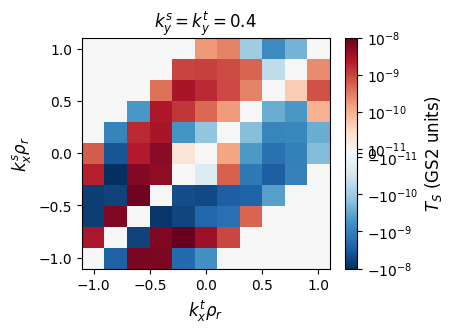

In [106]:
def plot_transfer_over_kx(iky_offset,save,savestr,zoom_mag=None):
  
    iky0 = int(len(transfer["kys"])/2)
    ikyt = iky0 + iky_offset
    ikys = ikyt
    # plot 4D transfer over kxs and kxt
    YY = transfer["kxs"].values
    XX = transfer["kxt"].values
    X, Y = np.meshgrid(XX,YY)

    Z = transfer_test[ikys,ikyt,:,:].values
    
    #norm = CenteredNorm()
    norm = SymLogNorm(linthresh=1e-10) #to see more than just the dominant ones

    pc = plt.pcolormesh(X,Y,Z, norm=norm)
    cbar = plt.colorbar(pc)
    cbar.set_label(r"$T_S$ (GS2 units)",fontsize=12)
    plt.ylabel(r"$k_x^s \rho_r$",fontsize=12)
    plt.xlabel(r"$k_x^t \rho_r$",fontsize=12)
    plt.title("$k_y^s = k_y^t = $"+str(transfer["kys"][ikyt].values))
    if zoom_mag is not None: 
        plt.xlim(-zoom_mag,zoom_mag)
        plt.ylim(-zoom_mag,zoom_mag)
    
    if save: plt.savefig(savestr,bbox_inches='tight',dpi=200)
    plt.show()
    
plot_transfer_over_kx(2,False,"plots/symmetry_1.png") # set kyt = kys = 0.4

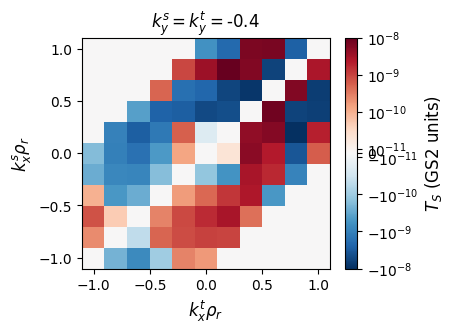

In [107]:
plot_transfer_over_kx(-2,False,"plots/symmetry_2.png") # set kyt = kys = -0.4

In [89]:
iky0 = int(len(transfer["kys"])/2)
ikx0 = int(len(transfer["kxs"])/2)

In [90]:
transfer_test.isel(kys=iky0+3,kyt=iky0+2,kxs=ikx0+1,kxt=ikx0+4).values

array(4.6739046e-10)

In [91]:
transfer_test.isel(kys=iky0+2,kyt=iky0+3,kxs=ikx0+4,kxt=ikx0+1).values

array(-4.6739046e-10)

-> symmetry T(k,q) = -T(q,k) now works just as in Steve's thesis.

In [97]:
kx = transfer["kxs"]
nkx = len(kx)

In [108]:
iky_offset = -2
iky0 = int(len(transfer["kys"])/2)
ikyt = iky0 + iky_offset
ikys = ikyt

Z = transfer_test[ikys,ikyt,:,:].values

non_zero = np.zeros((nkx,nkx))
for i in range(nkx):
    for j in range(nkx):
        if Z[i,j] != 0:
            non_zero[i,j] = 1
        else:
            non_zero[i,j] = 0

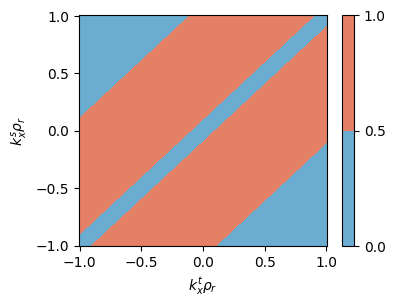

In [109]:
YY = kx
XX = YY
X, Y = np.meshgrid(XX,YY)

Z = non_zero
plt.contourf(X,Y,Z,levels=[0,0.5,1])
plt.colorbar()
plt.ylabel(r"$k_x^s \rho_r$")
plt.xlabel(r"$k_x^t \rho_r$")
plt.show()